In [1]:
import numpy as np
import cmasher as cmr
import matplotlib.pyplot as plt
from matplotlib.ticker import LogFormatter
import matplotlib.colors as mcolors
import cmasher as cmr

import h5py as h5
import warnings
warnings.filterwarnings('ignore')


plt.rcParams['axes.linewidth'] = 1.5
plt.rc('text', usetex=True)
plt.rc('font',**{'family':'serif','serif':['Palatino']}, size=21)

In [2]:
# Example

catalogue = '/scratch/hb19/gp5547/ArchivePhD/SpaxMoore/MooreL36/aout/mcdata/mer_z_12.hdf5'

f = h5.File(catalogue, 'r')
print("%d halos loaded"%len(list(f.keys())))
print(list(f.keys())[:10]) # Ordered by first digit, not sequentially 
print(list(f['Halo_0'].keys()))   
print(np.array(f['Halo_0/r']).shape)
print(np.array(f['Halo_0/rho']).shape)
print(np.array(f['Halo_0/nfw_fit']))

637 halos loaded
['Halo_0', 'Halo_1', 'Halo_10', 'Halo_100', 'Halo_101', 'Halo_102', 'Halo_103', 'Halo_104', 'Halo_105', 'Halo_106']
['nfw_fit', 'r', 'rho']
(199,)
(199,)
[1.83175530e+08 2.46492789e-07]


In [15]:
# masses = np.array([f[k].attrs['Mass'] for k in list(f.keys())[:-1]])
# masses

## Density profiles plots

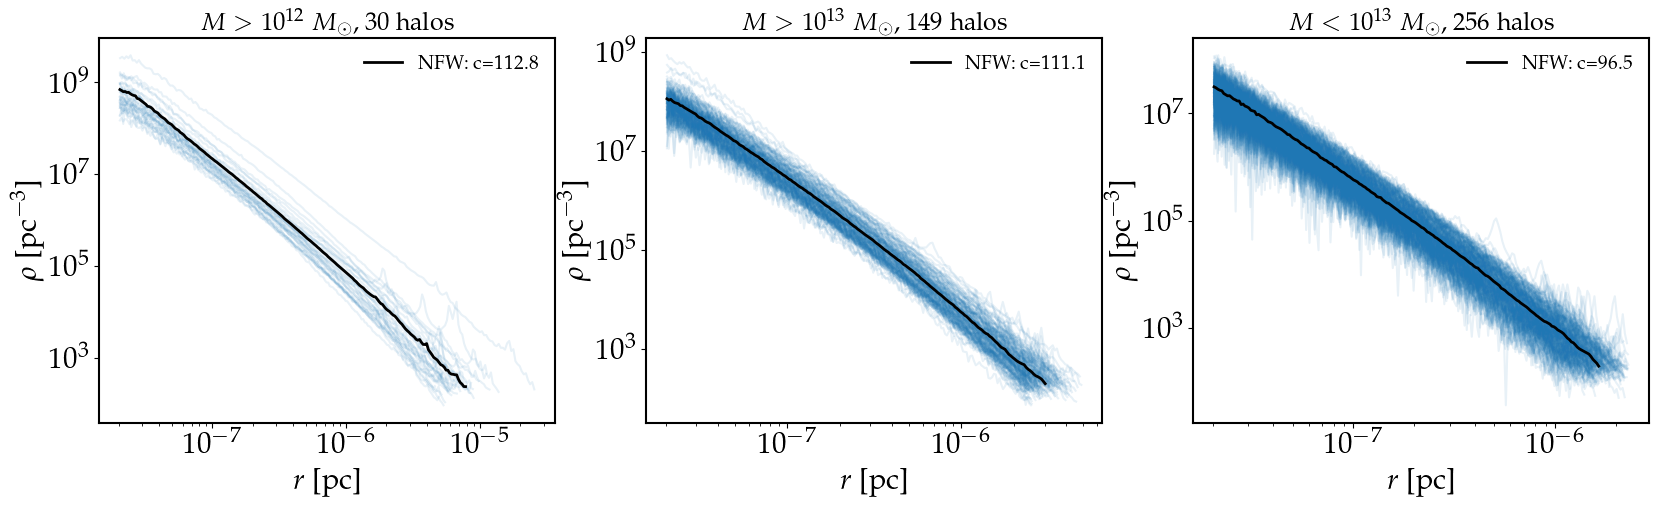

In [14]:
fig, ax = plt.subplots(1,3,figsize=(20,5))

m1, m2, m3 = [], [], []
r1, r2, r3 = [], [], []

count = 0

for k in list(f.keys())[:-1]:
    mass   = f[k].attrs['Mass']
    radius = f[k].attrs['Radius']
    rs     = f[k+'/nfw_fit'][1] # NFW scale radius
    filt   = np.array(np.where(np.array(f[k+'/rho'])==0)).size
    
    if filt > 0 or np.array(f[k+'/r'])[0]>5e-2: # Some profiles are too small or noisy and need to be filtered
        continue

    x, y = np.array(f[k+'/r']), np.array(f[k+'/rho'])
    count += 1
    if mass > 1e-12:
        ax[0].loglog(x*radius,y, c='C0', alpha=0.1)
        m1.append([x*radius, y])
        r1.append(radius/rs)
    elif mass > 1e-13:
        ax[1].loglog(x*radius,y, c='C0', alpha=0.1)
        m2.append([x*radius, y])
        r2.append(radius/rs)
    else:
        ax[2].loglog(x*radius,y, c='C0', alpha=0.1)
        m3.append([x*radius, y])
        r3.append(radius/rs)
            

av_r_1   = np.mean(np.array(m1), axis=0)[0]
av_rho_1 = np.mean(np.array(m1), axis=0)[1]
av_r_2   = np.mean(np.array(m2), axis=0)[0]
av_rho_2 = np.mean(np.array(m2), axis=0)[1]
av_r_3   = np.mean(np.array(m3), axis=0)[0]
av_rho_3 = np.mean(np.array(m3), axis=0)[1]


ax[0].loglog(av_r_1, av_rho_1, c='k', lw=2, label=r'NFW: c=%.1f'%(np.mean(r1)))
ax[1].loglog(av_r_2, av_rho_2, c='k', lw=2, label=r'NFW: c=%.1f'%(np.mean(r2)))
ax[2].loglog(av_r_3, av_rho_3, c='k', lw=2, label=r'NFW: c=%.1f'%(np.mean(r3)))
ax[0].set_title(r'$M>10^{12}~M_{\odot}$, %d halos'%(len(m1)), fontsize=18)
ax[1].set_title(r'$M>10^{13}~M_{\odot}$, %d halos'%(len(m2)), fontsize=18)
ax[2].set_title(r'$M<10^{13}~M_{\odot}$, %d halos'%(len(m3)), fontsize=18)

for i in range(len(ax)):
    ax[i].set_xlabel(r'$r$ [pc]')
    ax[i].set_ylabel(r'$\rho $ [pc$^{-3}$]')
    ax[i].legend(frameon=False, fontsize=14)
plt.show()